<h1>
<center>CFRM 421/521</center>
</h1>

<h1>
<center>Tong Wu</center>
</h1>

<h1>
<center>Homework 1</center>
</h1>

* **Due: Tuesday, April 15, 2025, 11:59 PM**


* Total marks: 49


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Preprocessing housing data [10 marks]

Hint: Reading Chapter 2 of the textbook and the accompanying [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb) on the textbook website may help with this question.

Consider the California housing data from Chapter 2 of the textbook. The following code fetches the data.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

Next, we create stratified test and training sets based on different income categories.

In [2]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_obj.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Let us separate the features (`X_raw`) and the response variable (`y`).

In [3]:
X_raw = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()

## (a) Handling missing values [1 mark]

Let us find out if there are any missing values in our features. As the code below indicates, out of 16512 observations, 158 have missing values. Further inspection shows that `total_bedrooms` has missing values (only a few missing values are shown below).

In [4]:
X_raw.shape

(16512, 9)

In [5]:
X_raw[X_raw.isnull().any(axis=1)].shape

(168, 9)

In [6]:
X_raw[X_raw.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


**Task:** Read the subsection "Data Cleaning" in Chapter 2 of the textbook. Use the `sklearn.impute.SimpleImputer` class to fill the missing values in the numerical features (everything except `ocean_proximity`) with the median of the corresponding feature.

**Solution:**

In [7]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = "median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
cleaned_data = imputer.transform(housing_num)
cleaned_df = pd.DataFrame(cleaned_data, columns=housing_num.columns)
print(cleaned_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


## (b) Handling categorical features  [2 marks]
ML algorithms generally work with numerical values. So, we need to convert categorical features to numerical values. One way is to simply map each category to an integer. Another alternative is to use **one-hot encoding**.

**Task:** Read subsection "Handling Text and Categorical Attributes" in Chapter 2 of the textbook. Then use the `sklearn.preprocessing.OrdinalEncoder` class and the `sklearn.preprocessing.OneHotEncoder` class to transform the `ocean_proximity` feature to integers and one-hot vectors. Explain why it is more appropriate to use one-hot encoding.

**Solution:**

In [8]:
#using the orginal encoder
ocean_proximity = housing[["ocean_proximity"]]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_encoded = ordinal_encoder.fit_transform(ocean_proximity)
print(housing_encoded)

[[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]


In [9]:
#using the onehot encoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_onehot = onehot_encoder.fit_transform(ocean_proximity)
print(housing_onehot[:5])

  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0


## (c) Feature engineering [2 marks]

Often it may be useful to experiment with transforming and combining features to create new features that may be expected to better predict the target variable. Features that are skewed or heavily tailed can be logged to make them closer to normal. An example of a feature combination is instead of using the number of bedrooms, which may not be meaningful by itself, we should consider the number of bedrooms relative to the number of rooms.

**Task:** Read the subsections "Custom Transformers" and "Transformation Pipelines" in Chapter 2 of the textbook. Use the `sklearn.preprocessing.FunctionTransformer` class take the log of `population`, and to create the ratio `total_bedrooms/total_rooms`. Print these two transformed features.

**Solution:**

In [10]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(
    func=np.log,
    inverse_func=np.exp,
    validate=False 
)
log_population = log_transformer.transform(housing[["population"]])

# Simplified ratio transformation
ratio_transformer = FunctionTransformer(
    lambda X: X.iloc[:, 0] / X.iloc[:, 1], 
    validate=False
)
ratio = ratio_transformer.transform(housing[["total_bedrooms", "total_rooms"]])

print("Log of population (first 5 rows):")
print(log_population.head())
print("\nBedroom to room ratio (first 5 rows):")
print(ratio.head())

Log of population (first 5 rows):
   population
0    5.774552
1    7.783641
2    6.206576
3    6.324359
4    6.336826

Bedroom to room ratio (first 5 rows):
0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
dtype: float64


## (d) Feature scaling and transformation [1 mark]

Many ML algorithms do not perform well if the features have different scales (some very small, and others very large). In such scenarios, one should transform the features so that they have a similar range of values. There are two common ways to achieve this. In **min-max** scaling, we subtract the feature from its minimum value and then divide by its range (i.e. maximum value minus minimum value) so that the scaled values are between 0 and 1. In **standardization**, we subtract the values from the average and divide by the standard deviation, so that the transformed values has mean 0 and variance 1, here we focus on the latter.

**Task:** Read the subsection "Feature Scaling and Transformation" in Chapter 2 of the textbook. Use the `sklearn.preprocessing.StandardScaler` class to scale the numerical features using standardization. 

**Solution:**

In [11]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_df = pd.DataFrame(housing_num_std_scaled,columns = housing_num.columns)
print(housing_df.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.970325   
1  -1.322844  1.043185           -0.607019     2.045890        1.348276   
2  -1.332827  1.038503            1.856182    -0.535746       -0.825561   
3  -1.337818  1.038503            1.856182    -0.624215       -0.718768   
4  -1.337818  1.038503            1.856182    -0.462404       -0.611974   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  


## (e) Transformation pipelines [4 marks]

Usually, we have to perform several steps before the data is ready to be fed to an ML algorithm. Scikit-Learn's `ColumnTransformer` and `Pipeline` classes provides a systematic way of "packaging" such a sequence of transformations.

**Task:** Read the subsection "Transformation Pipelines" in Chapter 2 of the textbook. Then create one pipeline that combines the above steps  in the following way applied to the original "raw" features `X_raw`: part (a) (a median imputer for numerical features), part (c) (create the ratios `total_bedrooms/total_rooms`, `total_rooms/households`, `population/households`; and take the log of `total_bedrooms`, `total_rooms`, `population`, `households`, `median_income`), part (d) (a standard scaler for all numerical features, including the transformed features), part (b) (one-hot encoding for categorical variables). Call your transformed features `X`, and print it.

**Solution:**

In [12]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

# Ratio pipeline
ratio_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("ratio", FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])),
    ("scale", StandardScaler())
])

# Log pipeline 
log_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler())

# numeric pipeline 
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)
# one-hot encoding pipeline 
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing = ColumnTransformer([
    #ratio part 
    ("bedroom_per_house", ratio_pipeline, ["total_bedrooms","total_rooms"]),
    ("room_per_house",ratio_pipeline,["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline, ["population", "households"]),
    #log part 
    ("log_values",log_pipeline,["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    #one hot encode 
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder = num_pipeline)

In [13]:
X = preprocessing.fit_transform(X_raw)

print(" X:")
print(X)  

 X:
[[ 1.84662439 -0.86602737 -0.33020372 ... -1.42303652  1.0136059
   1.86111875]
 [-0.5081207   0.0245495  -0.25361631 ...  0.59639445 -0.702103
   0.90762971]
 [-0.20215476 -0.04119332 -0.05104091 ... -1.2030985   1.27611874
   0.35142777]
 ...
 [-0.24249175 -0.10998748  0.15854151 ...  1.25620853 -1.42870103
  -1.23772062]
 [ 0.25977479 -0.36093745 -0.21033248 ...  0.58639727 -0.73960483
   0.66925745]
 [ 3.61270996 -1.32397227  0.04958379 ... -1.41803793  0.94797769
   1.22545939]]


# 2. Fine-tuning models [16 marks]

Hint: Reading Chapter 2 of the textbook and the accompanying [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb) on the textbook website may help with this question.

## (a) Linear regression [2 marks]

**Task:** Use the `sklearn.linear_model.LinearRegression` class to fit a linear regression to the training set in Question 1. Use the processed features `X` that you obtained in 1(e) as predictors and `y` (the median house values) as the response. Return fitted values of the response for the first 10 observations of the training set.

**Solution:**

In [14]:
from sklearn.linear_model import LinearRegression

# Create and fit the model directly on preprocessed X
lin_reg = LinearRegression()
lin_reg.fit(X, y)
ten_predictions = lin_reg.predict(X[:10])
print("First 10 predicted values:")
print(ten_predictions)


First 10 predicted values:
[260051.36004114 357897.79846769 125817.08984353 110019.21093156
 298948.54915206 206437.53193813 306787.01396099 326902.92850959
 162297.74181859  68786.66157655]


## (b) RMSE and MAE  [2 marks]

We can measure the performance with root mean square error (RMSE) and mean absolute error (MAE). 

**Task:** Use `mean_squared_error` and `mean_absolute_error` functions from `sklearn.metrics` to calculate the in-sample RMSE and MAE of the linear regression that you fit in part (a).

**Solution:**

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = lin_reg.predict(X)
lin_rmse = np.sqrt(mean_squared_error(y, y_pred))
lin_mae = mean_absolute_error(y, y_pred)
print("RMSE:", lin_rmse)
print("MAE:", lin_mae)

RMSE: 70630.22169174395
MAE: 53034.28396497742


## (c) Cross validation  [3 marks]

In part (b), we evaluated the in-sample performance of the linear regression model. To obtain out-of-sample performance, we use K-fold cross validation.

**Task:** Use the `cross_val_score` function from `sklearn.model_selection` to perform 10-fold  cross validation on the linear regression from part (a) and return the values of **RMSE**. Return the 10 RMSE scores as well as their mean.

**Solution:**

In [16]:
from sklearn.model_selection import cross_val_score
house_reg = LinearRegression()
house_rmses = -cross_val_score(house_reg, X, y,
                                  scoring="neg_root_mean_squared_error", cv=10)
print("10 RMSE scores from cross-validation:")
print(house_rmses)

print("\nMean RMSE:")
print(house_rmses.mean())

10 RMSE scores from cross-validation:
[72183.9055149  69449.07233135 68141.82330925 82348.92814938
 70200.08524327 70974.12115166 70512.16910063 73276.85042458
 69387.52951303 71463.70091766]

Mean RMSE:
71793.81856557202


## (d) Alternatives to linear regression [3 marks]
Let us consider fitting two alternative models, namely, **decision trees** and **random forests**. These models will be discussed in future lectures. The following code fits a decision tree and obtains the fitted response for the first 10 observations.

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [18]:
dt_reg.predict(X[:10,])

array([458300., 483800., 101700.,  96100., 361800.,  92600., 349300.,
       440900., 160100., 183900.])

The following code does the same for the random forest model.

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(bootstrap=True, n_estimators=100, max_depth=5, random_state=42)
rf_reg.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=42)

In [20]:
rf_reg.predict(X[:10,])

array([226052.57663663, 408572.3162281 , 100944.59292661,  95012.98416211,
       323566.08786234, 135098.37280907, 283371.7148996 , 357336.26089032,
       167697.90412093, 146436.2407077 ])

**Task:** Find the in-sample performance of the decision tree and the random forest using RMSE on the training set. Also, find the out-of-sample performance by 10-fold cross validation as you did in part (c). Which of the 3 models has the best in-sample performance? Which has the best out-of-sample performance?

**Solution:**

In [21]:
# decision tree RMSE
dty_pred = dt_reg.predict(X)
dt_rmse = np.sqrt(mean_squared_error(y, dty_pred))
# Random Forest RMSE
rf_pred = rf_reg.predict(X)
rf_rmse = np.sqrt(mean_squared_error(y, rf_pred))
# Decision Tree Cross Validation
dt_cv_rmse = -cross_val_score(dt_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)
dt_cv_mean = dt_cv_rmse.mean()
# Random Forest Cross Validation
rf_cv_rmse = -cross_val_score(rf_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)
rf_cv_mean = rf_cv_rmse.mean()

In [22]:
print("For RMSE:")
print("Linear Regression:", lin_rmse)
print("Decision Tree:", dt_rmse)
print("Random Forest:", rf_rmse)

print("For Cross Validation")
print("Linear Regression:", house_rmses.mean())
print("Decision Tree:", dt_cv_mean)
print("Random Forest:", rf_cv_mean)

For RMSE:
Linear Regression: 70630.22169174395
Decision Tree: 0.0
Random Forest: 62145.4331743811
For Cross Validation
Linear Regression: 71793.81856557202
Decision Tree: 70076.27568199515
Random Forest: 63719.39203227045


## (e) Choosing optimal values of hyperparameters using cross validation [4 marks]

Most ML algorithms have **hyperparameters**. These hyperparameters control the learning process and should not be confused with the model parameters (which are the unknown values that are being estimated). For example, the random forest algorithm has hyperparameter including `n_estimators` and `max_features`. To fine-tune a model, we should find good values of the hyperparameters based on out-of-sample performance.

**Task:** Read the subsections "Grid Search" and "Randomized Search" in Chapter 2 of the textbook. Consider the random forest model with the argument `random_state=42`. Use the `sklearn.model_selection.GridSearchCV` class to choose the best hyperparameter values for `max_features` over the values 4, 6, 8, 10 and `n_estimators` over the values 10, 50, 100. Use 3-fold cross-validation with RMSE when searching for the best hyperparameters.

Next, use the `sklearn.model_selection.RandomizedSearchCV` class to perform a randomized search with 10 iterations, where  `max_features` is a uniform random integer between 2 and 20 and `n_estimators` is a uniform random integer between 10 and 200. `RandomizedSearchCV` must include the argument `random_state=42`.


In both functions, you may use the argument `n_jobs=-1` to use all avaliable processor cores to speed up the calculation. Based on all of your results, what are the best hyperparameter values?

**Solution:**

In [23]:
from sklearn.model_selection import GridSearchCV
#full_pipeline = Pipeline([
    #("preprocessing", preprocessing),
    #("random_forest", RandomForestRegressor(random_state=42))
#])

rf_model = RandomForestRegressor(random_state=42)
parameter_grid = {
    "n_estimators": [10, 50, 100],
    "max_features": [4, 6, 8, 10]}

grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid, cv=3,
    n_jobs=-1, scoring='neg_root_mean_squared_error')

grid_search.fit(X, y)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [4, 6, 8, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_root_mean_squared_error')

In [24]:
print(grid_search.best_params_)

{'max_features': 6, 'n_estimators': 100}


## (f) Evaluating your final model using the test set [2 marks]

The last step of a ML project is to evaluate your (fine-tuned) model using the test set. The goal of this step is to estimate the out-of-sample performance of your trained model on new data. **Be careful not to train your model using the test set.** Do not use `.fit()` or `.fit_tranform()` of your estimators or pipelines. Also, **do not fine tune your hyperparameters after finding out the performance of a model on the test set as that would be data snooping.**

**Task:** Using the test set, find the RMSE of your best model in part (e).

**Solution:**

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_test_raw = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
x_test = preprocessing.transform(X_test_raw)

predictions = grid_search.best_estimator_.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Final Model Test RMSE:", rmse)


Final Model Test RMSE: 48990.45202127383


# 3. Regularizing linear regression [6 marks]

Consider the housing data set from Questions 1 and 2.

## (a) Polynomial regression and regularizing [2 marks]

Fit a model that adds degree 3 polynomial terms to the linear regression in 2(a). Next, regularize the model using ridge regression with parameter $\alpha=1$.

**Solution:**

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures(degree=3, include_bias=False)

poly_ridge_model = make_pipeline(poly_features,Ridge(alpha=1))

poly_ridge_model.fit(X, y)


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge(alpha=1))])

## (b) Learning curves [4 marks]

Obtain learning curves using the function `sklearn.model_selection.learning_curve` to plot the learning curve with 5-fold CV for the linear regression model that you fitted in 2(a), the polynomial regression model in 3(a), and the ridge regression model in 3(a). Hence, comment on whether the curves indicate the models are underfitting, overfitting or neither.

**Solution:**

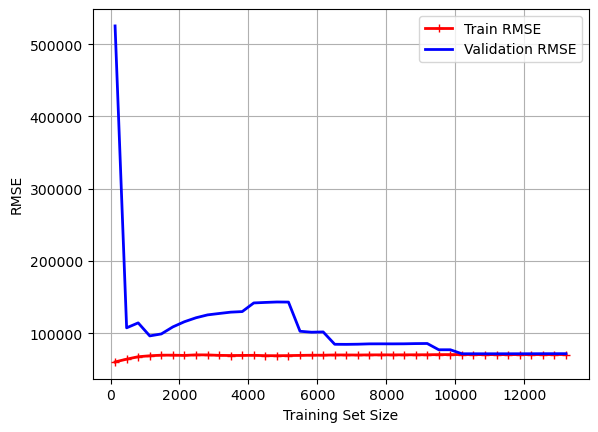

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error",n_jobs=-1)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Train RMSE")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="Validation RMSE")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.show()

This model does not show strong over fitting or under fitting, so it is a well-fit model. 

# 4. Default dataset [17 marks]


In this question you will work with the Default dataset, which is a simulated dataset of credit card default for 10000 customers. Download the data as a csv file from [Canvas](https://canvas.uw.edu/files/104571273/download?download_frd=1). The data was originally obtained from the R library ISLR2, and you can read the documentation for the dataset [here](https://cran.rstudio.com/web/packages/ISLR2/ISLR2.pdf).

You want to predict credit card defaults. The target for this classification problem is `default` and all other variables are the features. 

## (a) [2 marks]
Load the dataset. If it is stored in a file named `Default.csv` in your working directory, this can be done with the code below. Then use `sklearn.model_selection.train_test_split` to split the data into a training and a test set, using 20% of the data for the test set. When doing the splitting, use the random seed 42.

In [28]:
import os
data = pd.read_csv("/Users/lydia22/Desktop/CFRM421 HW1/Default-2.csv")

**Solution:**

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [30]:
X_train_raw = train_set.drop("default", axis=1)
y_train = train_set["default"]
X_test_raw = test_set.drop("default", axis=1)
y_test = test_set["default"]

## (b) [3 marks]

Design a pipeline for preprocessing that applies one hot encoding to the categorical features and a standard scaler to the numerical features.

**Solution:**

In [31]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
preprocessing =  ColumnTransformer([
    ("numeric", numeric_transformer, make_column_selector(dtype_include="number")),
    ("categorical", categorical_transformer, make_column_selector(dtype_include=object))
])

## (c) [4 marks]
Train a logistic regression classifier and a `SGDClassifier`, and then using 10-fold cross-validation plot the ROC curve of the classifiers and compute their ROC AUC. Use the default arguments, except you must include the argument `random_state=42`.  Furthermore, for the logistic regression, compute the ROC AUC for `C` taking the values 0.001, 0.01, 0.1, 1, 10, 100, to show that the default value of 1 is approximately optimal.

In [32]:
X_train = preprocessing.fit_transform(X_train_raw)
y_train_2 = y_train.copy()

**Solution:**

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
C_val = [0.001,0.01, 0.1, 1, 10, 100]
ROC_AUC = []

for C in C_val:
    log_clf = LogisticRegression(random_state=42, C=C)
    y_scores = cross_val_predict(log_clf, X_train, y_train_2, cv=10, method="decision_function")
    auc = roc_auc_score(y_train_2, y_scores)
    print(f"C = {C}: ROC AUC = {auc:.4f}")

C = 0.001: ROC AUC = 0.9466
C = 0.01: ROC AUC = 0.9500
C = 0.1: ROC AUC = 0.9503
C = 1: ROC AUC = 0.9501
C = 10: ROC AUC = 0.9502
C = 100: ROC AUC = 0.9502


In [34]:
sgd_clf = SGDClassifier(random_state=42)
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_2, cv=10, method="decision_function", n_jobs=-1)
roc_auc_sgd = roc_auc_score(y_train_2, y_scores_sgd)

## (d) [5 marks]

For the classifiers in part (c), plot on the same axes the precision as a function of the threshold and the recall as a function of the threshold. Now suppose you want to achieve a recall of 75%. Consider 4 models:
 1.  The logistic regression classifier in (c),
 2. `SGDClassifier` in (c),
 3. A logistic regression with the argument `class_weight="balanced"`,
 4. `SGDClassifier` with the argument `class_weight="balanced"`.
 
For each of the 4 models, determine the threshold to achieve a 75% recall based on 10-fold cross-validation. Then determine the corresponding precisions. Which model has the best precision?

**Solution:**

In [35]:
# logistic regression 
log_reg = LogisticRegression(random_state=42)
score_log = cross_val_predict(log_reg, X_train, y_train_2, cv=10, method="decision_function")
precision_log, recall_log, thres_log = precision_recall_curve(y_train_2, score_log, pos_label='Yes')

index_log = np.argmin(np.abs(recall_log - 0.75))
# find the index of the recall that is closest to the 75%  
thres_log_75 = thres_log[index_log]
prec_log_75 = precision_log[index_log]

In [36]:
#SGD Classifier 
# we have sgd_clf before 
score_sgd = cross_val_predict(sgd_clf, X_train, y_train_2, cv=10, method="decision_function")
precision_sgd, recall_sgd, thres_sgd = precision_recall_curve(y_train_2, score_sgd, pos_label='Yes')

index_sgd = np.argmin(np.abs(recall_sgd - 0.75))
# find the index of the recall that is closest to the 75%
thres_sgd_75 = thres_sgd[index_sgd]
prec_sgd_75 = precision_sgd[index_sgd]

In [37]:
#Logistic Rregression Balanced 
log_reg_balance = LogisticRegression(random_state=42, class_weight="balanced")
score_log_bal = cross_val_predict(log_reg_balance, X_train, y_train_2, cv=10, method="decision_function")
precision_log_bal, recall_log_bal, thres_log_bal = precision_recall_curve(y_train_2, score_log_bal, pos_label='Yes')

index_log = np.argmin(np.abs(recall_log_bal - 0.75))
# find the index of the recall that is closest to the 75%  
thres_logbal_75 = thres_log_bal[index_log]
prec_logbal_75 = precision_log_bal[index_log]


In [38]:
#SGD Classifier balanced 
sgd_balance = SGDClassifier(random_state=42, class_weight="balanced")
score_sgd_bal = cross_val_predict(sgd_balance, X_train, y_train_2, cv=10, method="decision_function")
precision_sgd_bal, recall_sgd_bal, thres_sgd_bal = precision_recall_curve(y_train_2, score_sgd_bal, pos_label='Yes')

index_sgd_bal = np.argmin(np.abs(recall_sgd_bal - 0.75))
# find the index of the recall that is closest to the 75%
thres_sgd_bal_75 = thres_sgd_bal[index_sgd]
prec_sgd_bal_75 = precision_sgd_bal[index_sgd]

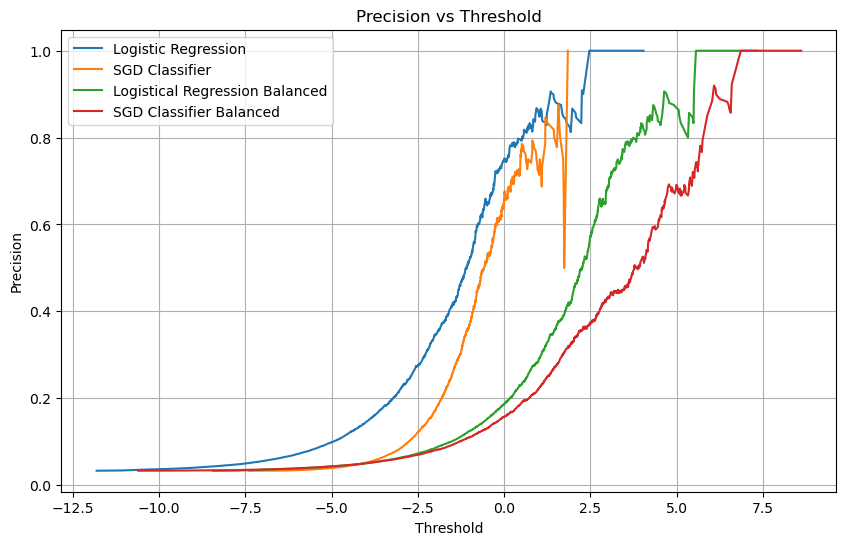

In [39]:

plt.figure(figsize=(10, 6))
plt.plot(thres_log, precision_log[:-1], label="Logistic Regression")
plt.plot(thres_sgd, precision_sgd[:-1], label="SGD Classifier")
plt.plot(thres_log_bal, precision_log_bal[:-1], label="Logistical Regression Balanced")
plt.plot(thres_sgd_bal, precision_sgd_bal[:-1], label="SGD Classifier Balanced")

plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Precision vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


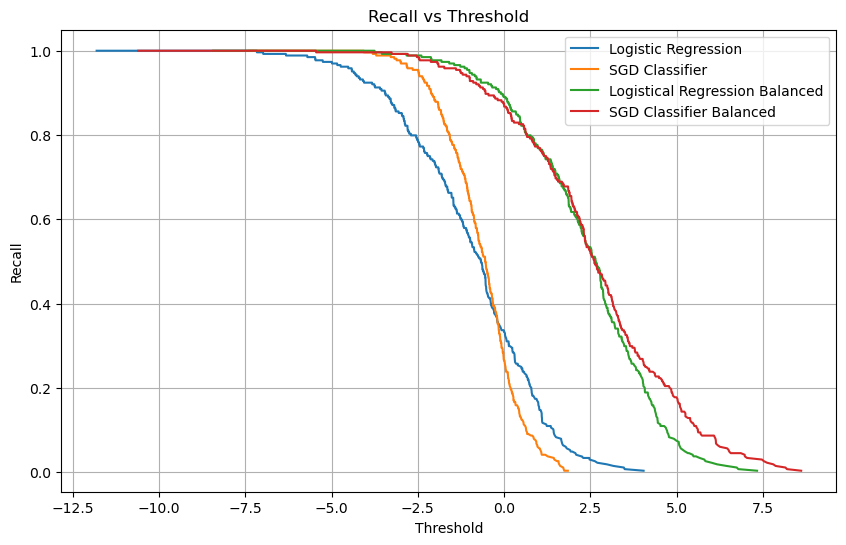

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(thres_log, recall_log[:-1], label="Logistic Regression")
plt.plot(thres_sgd, recall_sgd[:-1], label="SGD Classifier")
plt.plot(thres_log_bal, recall_log_bal[:-1], label="Logistical Regression Balanced")
plt.plot(thres_sgd_bal, recall_sgd_bal[:-1], label="SGD Classifier Balanced")

plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
summary = pd.DataFrame({
    "Model": ["Logistic Regression", "SGD Classifier", "LogReg (balanced)", 
              "SGD (balanced)"],
    "Threshold": [round(thres_log_75, 3),round(thres_sgd_75, 3),round(thres_logbal_75, 3),
                  round(thres_sgd_bal_75, 3)],
    "Precision": [round(prec_log_75, 3),round(prec_sgd_75, 3),round(prec_logbal_75, 3),
                  round(prec_sgd_bal_75, 3)]})
summary

,Model,Threshold,Precision
0,Logistic Regression,-2.214,0.311
1,SGD Classifier,-1.348,0.288
2,LogReg (balanced),1.154,0.309
3,SGD (balanced),1.461,0.270


## (e) [3 marks]

Fit the best classifier in (d) to the whole training data, and use it to predict on the test set. What is its accuracy, precision, recall, ROC curve and ROC AUC over the test set?

**Solution:**

In [42]:
y_train_2 = y_train.copy()     # or: (y_train == "Yes")
y_test_2 = y_test.copy()       # same logic
x_train = preprocessing.transform(X_train_raw)
x_test = preprocessing.transform(X_test_raw)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_curve, roc_auc_score
)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train_2)

# Predict on test set
y_test_pred = log_reg.predict(x_test)
y_test_proba = log_reg.predict_proba(x_test)[:, 1]  # probs for positive class

# Evaluate
accuracy = accuracy_score(y_test_2, y_test_pred)
precision = precision_score(y_test_2, y_test_pred, pos_label="Yes")
recall = recall_score(y_test_2, y_test_pred, pos_label="Yes")
fpr, tpr, thresholds = roc_curve(y_test_2, y_test_proba, pos_label="Yes")
roc_auc = roc_auc_score(y_test_2, y_test_proba)

# Print results
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"ROC AUC:   {roc_auc:.3f}")


Accuracy:  0.970
Precision: 0.655
Recall:    0.275
ROC AUC:   0.943
